### 분류 성능평가 지표

- metrics 서브 패키지
- confusion_matrix(answer, prediction)
- accuracy_score()
- precision_score()
- recall_score()
- f1_score()
- classification_report()
- roc_curve()
- auc()

In [86]:
y_test = [1,0,0,1,1,1,0,1,1,1]
y_pred = [0,1,1,1,1,0,1,0,1,0]

for i in range(len(y_test)) :
    # TP
    if y_test[i] == 1 and y_pred[i] == 1 :
        tp += 1
    # TN
    if y_test[i] == 0 and y_pred[i] == 0 :
        tn += 1
    #FP
    if y_test[i] == 0 and y_pred[i] == 1 :
        fp += 1
    # FN
    if y_test[i] == 1 and y_pred[i] == 0 :
        fn += 1

NameError: name 'fn' is not defined

In [88]:
# Accuracy

     TP + TN
----------------
TP + TN + FP + FN

# Recall
   TP
-------
TP + FN

# Percision
   TP
------
TP + FP

# F1 Score
    Precision + Recall
2 * ----------------
    Precision + Recall
    
# fallout(위 양성율)
# 실제 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 예측한 표본의 비율
# 낮아야 좋은 모형으로 본다
# 거래 - 실제 정상 거래인데 사기 거래로 예측한 거래의 비율 (False Positive Rate)
   FP
-------
FP + TN

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 26)

In [89]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [90]:
# 분류 결과표 : 행은 실제 데이터, 열은 예측 데이터를 의미
confusion_matrix(y_true , y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

### 이진 분류표
-  제품을 생산하는 제조 공장에서 품질 테스트를 실시해 불량품을 찾아내고 불량품을 공장으로 돌려보낸다(recall).
-  품질 테스트의 결과가 양성 -> 불량품이라고 예측한 것이고
-  품질 테스트의 결과가 음성 -> 정상 제품이라고 예측

- TP(True Positive) : 불량품을 불량품으로 정확하게 예측
-  TN(True Negative) : 정상제품을 정상제품으로 정확하게 예측
-  FP(False Positive) : 정상제품을 불량품으로 잘못 예측
-  FN(False Negative) : 불량품을 정상제품으로 잘못 예측

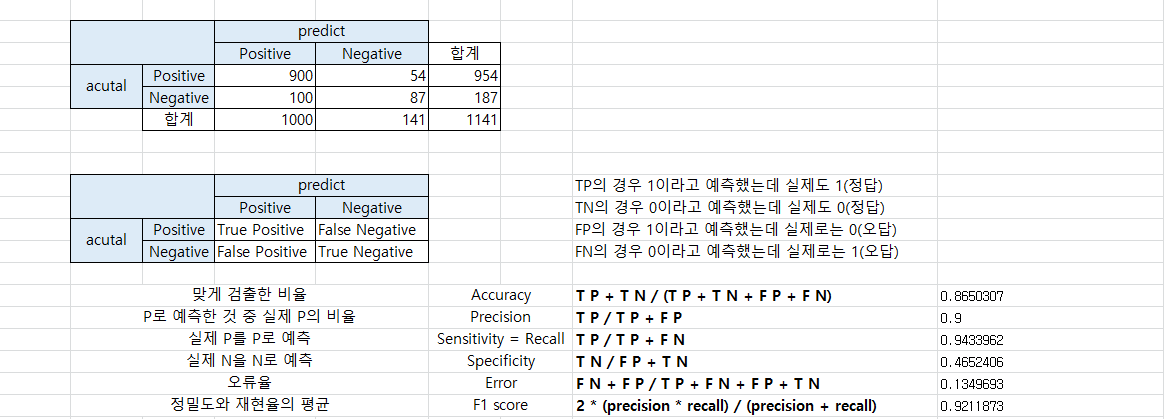

In [91]:
from IPython.display import Image
Image('C:/Users/i/data/confusion_matrix.png', width = 700)

In [92]:
#                 불량 예측        정상 예측
# 불량품             FP                FN
# 정상제품           NP                TN

#  암(cancer) - 양성(positive) , 암X -> 음성(N)
#         예측 암       예측 암X
    
# 암         TP               FN
# 암 X       FP               TN

#  FN : 암인데 암이 아니라고 예측
#  FP : 암이 아닌데 암이라고 예측

#  사기 거래 찾아내는 시스템
#         사기 예측      사기X 예측
# 사기       TP              FN
# 사기X      FP              TN

#FP : 1종 오류

#FN : 2종 오류

In [93]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true , y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [94]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [95]:
### fit() 메서드는 아무 것도 수행하지 않고, predict()는 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred


In [96]:
titanic = pd.read_csv('C:/Users/i/data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
titanic_label = titanic['Survived']
print(titanic_label)
titanic_feature_df = titanic.drop(['Survived'] , axis=1)
print(titanic_feature_df.head())

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0    

In [99]:
## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [100]:
titanic_feature_df = transform_features(titanic_feature_df)

In [101]:
X_train , X_test , y_train , y_test = train_test_split(titanic_feature_df, titanic_label, 
                                                       test_size = 0.2,
                                                       random_state = 10
                                                       )

In [102]:
dummy_model = MyDummyClassifier()

In [103]:
dummy_model.fit(X_train, y_train)

In [104]:
y_pred = dummy_model.predict(X_test)
print('accuracy {}'.format(accuracy_score(y_test , y_pred)))

accuracy 0.8212290502793296


- 업무 특성에 따라 특정 지표를 활용해야 한다.
- Recall(재현율) -> 암 , 사기 판정 / Precision(정밀도) : 스팸메일 분류
- 재현율 함수 : recall_score() / 정밀도 함수 : precision_score()

In [105]:
def display_eval(y_test , y_pred) :
    confusion = confusion_matrix(y_test , y_pred)
    accuracy  = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)
    recall = recall_score(y_test, y_pred)
    print()
    print(confusion)
    print("*" * 50)
    print()
    print('정확도 : {} , 정밀도 : {} , 재현율 : {}'.format(accuracy, precision, recall))

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
prediction = lr_model.predict(X_test)
display_eval(y_test , prediction)


[[101  16]
 [ 15  47]]
**************************************************

정확도 : 0.8268156424581006 , 정밀도 : 0.746031746031746 , 재현율 : 0.7580645161290323


In [107]:
print('accuracy : ' , (101+47) / (101+15+16+47))

# 예측 True 의 실제 True
print('recall :' , (47) / (47+15))

# 예측 True 의 실제 True
print('precision :' , (47) / (47+16))


accuracy :  0.8268156424581006
recall : 0.7580645161290323
precision : 0.746031746031746


In [108]:
# [실습] - 유방암 관련 데이터 - 정확 , 재현율이 중요하다 (실제 P를 N으로 예측하면 안 되는 경우)
# 재현율은 실제 양성을 양성으로 예측한 비율이므로 높을수록 좋은 성능 모형이라 판단할 수 있다.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [109]:
cancer = load_breast_cancer()
cancer # type : Bunch

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [110]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [111]:
# 데이터 프레임으로 구조를 변경해 확인해보자
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

In [112]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [113]:
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [114]:
#[실습]

# 분류 학습기 생성
# 학습 및 평가 (k-fold 교차 검증)
# 평가 지표에 대한 평균값을 구하시오.
# accuracy , precision , recall

In [115]:
# 학습 위한 학습기 - 알고리즘으로 이루어진 객체

rf_model = RandomForestClassifier()

# 데이터 세트 분리
label    = cancer_df['target']
features = cancer_df.drop(columns=['target'], axis=1) 
print('label\n' , label)
print('features\n' , features)

label
 0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32
features
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0       

In [116]:
from sklearn.model_selection import cross_validate , KFold
from sklearn.metrics import make_scorer , f1_score

# 학습 및 평가 (교차 검증)
fold = KFold(n_splits=20 , 
             random_state=1,
             shuffle=True)

scoring = {
        'accuracy'  :  make_scorer(accuracy_score) ,
        'precision' :  make_scorer(precision_score),
        'recall'    :  make_scorer(recall_score) , 
        'f1_score'  :  make_scorer(f1_score)
 }

result = cross_validate(rf_model , features , label , cv=fold , scoring=scoring)

print( result.keys() )



dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score'])


In [117]:
# 평가지표에 대한 평균값을 구해보자 
print('accuracy' ,  np.round( result['test_accuracy'].mean(), 2) )
print('precision' , np.round( result['test_precision'].mean(), 2) )
print('recall' ,    np.round( result['test_recall'].mean(), 2) )
print('f1_score' ,    np.round( result['test_f1_score'].mean(), 2) )

accuracy 0.96
precision 0.97
recall 0.97
f1_score 0.97


In [118]:
# 그리드 서치(Case 02)


X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.2)



from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(random_state=123)


params = {
    'n_estimators' : [200, 300],
    'max_features' : [8, 10],
    'max_depth'    : [4, 6]
}


Grid_rf = GridSearchCV(random_forest, 
                       param_grid = params,
                       cv         = 3,
                       scoring    = 'recall')

Grid_rf.fit(X_train, y_train)
print(Grid_rf.best_params_)
print(Grid_rf.best_score_)

# {'max_depth': 4, 'max_features': 8, 'n_estimators': 200}
# 0.9669922669922671


# test set 예측

y_pred = Grid_rf.best_estimator_.predict(X_test)





    

{'max_depth': 4, 'max_features': 8, 'n_estimators': 200}
0.98292306613367


In [155]:
# 모델성능평가 함수
def display_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('accuracy' , accuracy)
    print('precision' , precision)
    print('recall' , recall)

In [156]:
display_eval(y_test, y_pred)

accuracy 0.8268156424581006
precision 0.746031746031746
recall 0.7580645161290323


### precision / recall tradeOff
- predict_proba() : 예측 레이블의 확률을 반환해주는 함수

In [157]:
### fit() 메서드는 아무 것도 수행하지 않고, predict()는 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred


In [158]:
titanic = pd.read_csv('C:/Users/i/data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
titanic_label = titanic['Survived']
print(titanic_label)
titanic_feature_df = titanic.drop(['Survived'] , axis=1)
print(titanic_feature_df.head())

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0    

In [160]:
## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [161]:
titanic_feature_df = transform_features(titanic_feature_df)

In [162]:
X_train , X_test , y_train , y_test = train_test_split(titanic_feature_df, titanic_label, 
                                                       test_size = 0.2,
                                                       random_state = 10
                                                       )

In [163]:
dummy_model = MyDummyClassifier()

In [164]:
dummy_model.fit(X_train, y_train)

In [165]:
y_pred = dummy_model.predict(X_test)
print('accuracy {}'.format(accuracy_score(y_test , y_pred)))

accuracy 0.8212290502793296


In [166]:
def display_eval(y_test , y_pred) :
    confusion = confusion_matrix(y_test , y_pred)
    accuracy  = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)
    recall = recall_score(y_test, y_pred)
    print()
    print(confusion)
    print("*" * 50)
    print()
    print('정확도 : {} , 정밀도 : {} , 재현율 : {}'.format(accuracy, precision, recall))

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
prediction = lr_model.predict(X_test)
display_eval(y_test , prediction)


[[101  16]
 [ 15  47]]
**************************************************

정확도 : 0.8268156424581006 , 정밀도 : 0.746031746031746 , 재현율 : 0.7580645161290323


In [168]:
import numpy as np
import pandas as pd

# titanic LogisticRegression 했던 모델로 테스트하는 코드 
pred_pro_result = lr_model.predict_proba(X_test)
print('shape' , pred_pro_result.shape)
print('result\n', pred_pro_result[:3])
print()
print("*" * 50)
print()
y_pred = lr_model.predict(X_test)
print(y_pred)
print(y_test)
result = np.concatenate([pred_pro_result , y_pred.reshape(-1,1)] , axis=1)
print('확률에 따른 예측 결과\n' , result[:5])
print("*" * 50)
print()

shape (179, 2)
result
 [[0.90642125 0.09357875]
 [0.85371789 0.14628211]
 [0.8771801  0.1228199 ]]

**************************************************

[0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1]
590    0
131    0
628    0
195    1
230    1
      ..
456    0
191    0
603    0
94     0
766    0
Name: Survived, Length: 179, dtype: int64
확률에 따른 예측 결과
 [[0.90642125 0.09357875 0.        ]
 [0.85371789 0.14628211 0.        ]
 [0.8771801  0.1228199  0.        ]
 [0.07331652 0.92668348 1.        ]
 [0.10645454 0.89354546 1.        ]]
**************************************************



- Binarizer 클래스 fit_transform()

In [170]:
# 모델성능평가 함수
def display_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('accuracy' , accuracy)
    print('precision' , precision)
    print('recall' , recall)

In [173]:
from sklearn.preprocessing import Binarizer
user_threshold = 0.5
# pred_pro_result[: , 1]
positive_pred_proba = pred_pro_result[: , 1].reshape(-1,1)
# positive_pred_proba
user_predict = Binarizer(threshold=user_threshold).fit(positive_pred_proba).transform(positive_pred_proba)
display_eval(y_test , user_predict)

accuracy 0.8268156424581006
precision 0.746031746031746
recall 0.7580645161290323


In [177]:
user_threshold = 0.1
# pred_pro_result[: , 1]
positive_pred_proba = pred_pro_result[: , 1].reshape(-1,1)
# positive_pred_proba
user_predict = Binarizer(threshold=user_threshold).fit(positive_pred_proba).transform(positive_pred_proba)
display_eval(y_test , user_predict)

accuracy 0.5027932960893855
precision 0.40939597315436244
recall 0.9838709677419355


- threshold 를 낮추면 재현율은 올라가고 , 정밀도는 떨어진다.
- precision_recall_curve(정답 , 예측 확률값) : 정밀도 , 재현율 값을 리턴시켜준다.

In [202]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_positive_label = lr_model.predict_proba(X_test)[:, 1]
# print(pred_positive_label)
precisions , recalls , thresholds = precision_recall_curve(y_test , pred_positive_label)
# print('precisions : \n' , precisions)
# print('recalls : \n' , recalls)
print(thresholds.shape)

(162,)


- 시각화(정밀도, 재현율이 임계값 변화에 따른 시각화)

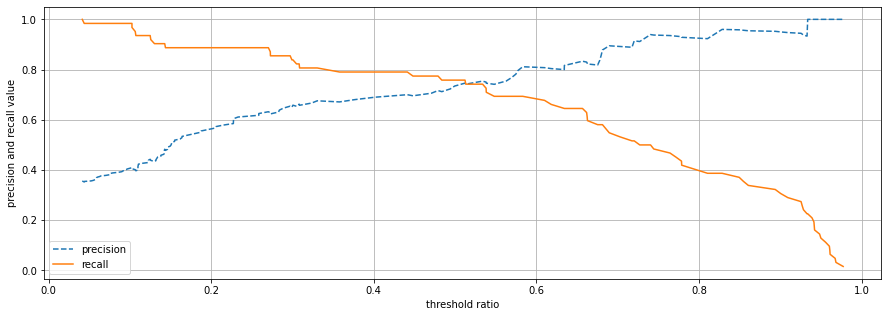

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline

precisions , recalls , thresholds = precision_recall_curve(y_test , pred_positive_label)

plt.figure(figsize=(15, 5))

plt.plot(thresholds, precisions[0 : thresholds.shape[0]], linestyle='--' , label='precision') # X, Y 축 개수가 맞지 않아 슬라이싱으로 맞춰줌
plt.plot(thresholds, recalls[0 : thresholds.shape[0]], label = 'recall')

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.legend()
plt.grid()
plt.show()

### ROC 곡선과 AUC
- FPR(False Positive Rate) , TPR(True Positive Rate) 

- 타이타닉을 이용한 생존자 예측 FPR , TPR , 임계값
- roc_curve(실제값 , 예측 확률 값) : FPR , TPR , 임계값

In [224]:
from sklearn.metrics import roc_curve
# 레이블 값이 1일 때의 예측 확률을 추출
pred_positive_label = lr_model.predict_proba(X_test)[: , 1]

fprs , tprs , thresholds = roc_curve(y_test , pred_positive_label)
print(fprs.shape[0])
print(fprs.shape[0])
print(thresholds.shape[0])

print("샘플 추출")
print()
thr_idx = np.arange(1 , thresholds.shape[0] , 6)
print('thr_idx : ' , thr_idx)
print()
print('threshold value :' , thresholds[thr_idx])
print()
print('fprs value :' , fprs[thr_idx])
print()
print('tprs value :' , tprs[thr_idx])

# 출력 결과를 보면 임계값이 1에서 멀어질수록 FPR 값이 커지면서 TPR 값도 커지는 것을 확인할 수 있다.

56
56
56
샘플 추출

thr_idx :  [ 1  7 13 19 25 31 37 43 49 55]

threshold value : [0.97705291 0.72696136 0.65654307 0.5120958  0.3304279  0.29711527
 0.18758072 0.12499306 0.109969   0.02692116]

fprs value : [0.         0.02564103 0.06837607 0.13675214 0.20512821 0.23931624
 0.37606838 0.62393162 0.72649573 1.        ]

tprs value : [0.01612903 0.5        0.64516129 0.75806452 0.80645161 0.85483871
 0.88709677 0.93548387 0.93548387 1.        ]


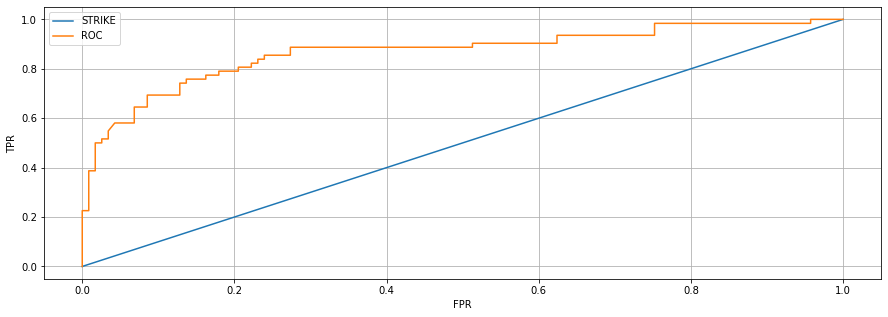

In [227]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

pred_positive_label = lr_model.predict_proba(X_test)[:, 1]
fprs , tprs , thresholds = roc_curve(y_test , pred_positive_label)

plt.figure(figsize=(15, 5))
# 대각선
plt.plot([0,1] , [0,1] , label='STRIKE')
# ROC
plt.plot(fprs , tprs , label='ROC')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()

In [231]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# 위 코드 확인 후
# 로지스틱 회귀
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
prediction = lr_model.predict(X_test)
print('roc auc value {}'.format(roc_auc_score(y_test , prediction))) # 출력값은 1에 가까워지는 면적을 의미

roc auc value 0.8106561896884479
